## 4 - Modeling & Analysis — Introduction

### Objective of This Notebook

The aim of this notebook is to:

* Build and evaluate machine learning models based on the engineered features.
* Compare model performance across different algorithms.
* Identify the most influential features driving predictive power.
* Generate insights connecting model outputs back to the original domain problem.
* Document limitations, observations, and recommendations for further improvement.

### What You Will Find Here

* **Preparation of final modeling dataset**
* **Model selection and training** (baseline models + advanced models)
* **Evaluation using appropriate metrics**
* **Feature importance and interpretability analysis**
* **Visualizations summarizing model behavior**
* **Final insights and conclusions**

This notebook represents the synthesis of all previous work—turning cleaned and enriched data into actionable predictions and insights.


In [131]:
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

FILE_PATH = '../data/03_processed_data.csv'
df = pd.read_csv(FILE_PATH)
df.head()

,Player,Rank,Vote Share,Year,League,League Rating,League Top Scorer,League Top Assist Provider,League Best Goalkeeper,League Best Player,...,WC Top Assist Provider,WC Best Goalkeeper,WC Best Player,Other Rating,Time-Weighted Google Trend Score,Wiki Page Views,Position_Defender,Position_Forward,Position_Goalkeeper,Position_Midfielder
0,Karim Benzema,1,1.000000,2022,0.889407,1.205121,2.171241,-0.301511,-0.09167,2.171241,...,-0.160128,-0.09167,-0.09167,0.321297,1.598513,0.239192,0.0,1.0,0.0,0.0
1,Sadio Mané,2,0.351548,2022,-1.124345,-0.561851,-0.460566,-0.301511,-0.09167,-0.460566,...,-0.160128,-0.09167,-0.09167,0.621809,-0.159285,-0.018500,0.0,1.0,0.0,0.0
2,Kevin De Bruyne,3,0.318761,2022,0.889407,1.378353,-0.460566,-0.301511,-0.09167,2.171241,...,-0.160128,-0.09167,-0.09167,1.493293,0.277445,-0.263759,0.0,0.0,0.0,1.0
3,Robert Lewandowski,4,0.309654,2022,0.889407,0.304312,2.171241,-0.301511,-0.09167,-0.460566,...,-0.160128,-0.09167,-0.09167,1.012474,1.914285,0.277259,0.0,1.0,0.0,0.0
4,Mohamed Salah,5,0.211293,2022,-1.124345,-0.839023,2.171241,3.316625,-0.09167,-0.460566,...,-0.160128,-0.09167,-0.09167,-0.730494,0.920242,0.391415,0.0,1.0,0.0,0.0


# 1 - Correlation Analysis

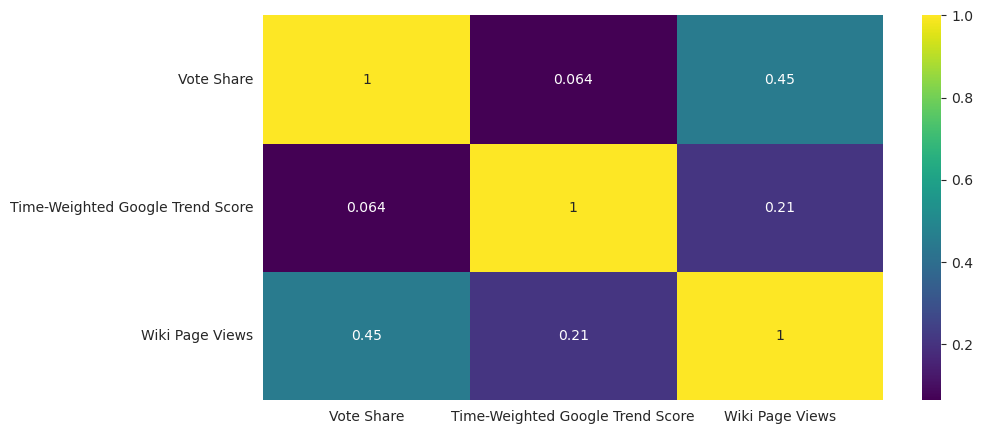

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,5))

sns.heatmap(
    df[['Vote Share', 'Time-Weighted Google Trend Score', 'Wiki Page Views']].corr(), 
    annot=True, 
    cmap='viridis'
)
plt.show()

# 📝 Insight 1 — Correlation Between PR Metrics and Ballon d’Or Vote Share

## 📊 Overview
This correlation matrix examines how **Vote Share** relates to two PR-related variables:

- **Time-Weighted Google Trend Score**
- **Wiki Page Views**

## 🔍 Key Findings

### ⭐ 1. Wiki Page Views show a moderate positive correlation with Vote Share (r = 0.45)
- Players with higher **public attention** (Wikipedia views) tend to receive **higher Ballon d’Or vote share**.
- Indicates public visibility may influence perceptions among voters.
- Not causal, but a meaningful association.

### 🌐 2. Google Trends show a very weak correlation with Vote Share (r = 0.064)
- Search interest does **not strongly align** with vote share.
- Google Trends may capture hype spikes, not sustained reputation.
- Suggests **Google Trends is a noisy PR indicator** for this award.

### 🔗 3. Wiki Page Views and Google Trends are weakly correlated (r = 0.21)
- They capture **different types of attention**:
  - Google Trends → short-term buzz
  - Wikipedia Views → deeper information-seeking
- Supports using both as complementary features.

## 🧠 Summary
- **Public attention matters**: Wikipedia views moderately link to Ballon d’Or success.
- **Hype alone does not**: Google Trends has almost no correlation.


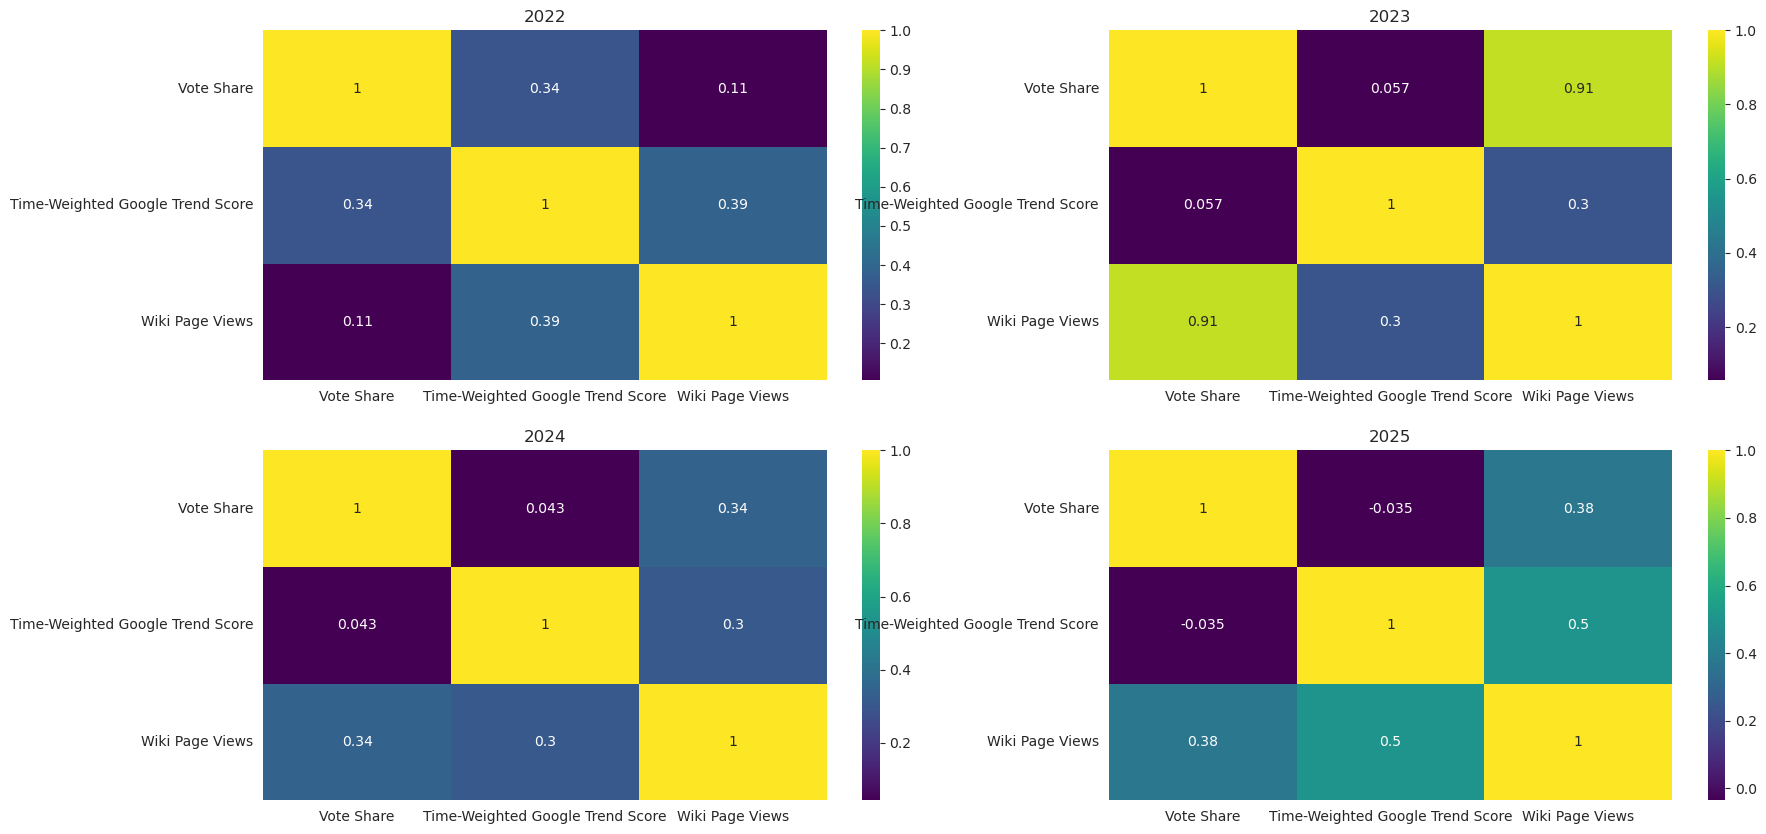

In [133]:
rows, cols = 2, 2
plt.figure(figsize = (20,10))

for i, year in enumerate(range(2022, 2026)):
    plt.subplot(rows, cols, i+1)
    sns.heatmap(
        df[df['Year'] == year][['Vote Share', 'Time-Weighted Google Trend Score', 'Wiki Page Views']].corr(), 
        annot=True, 
        cmap='viridis'
    )
    plt.title(str(year))

# 📝 Insight 2 — Year-by-Year Correlation Between PR Metrics and Ballon d’Or Vote Share

This analysis breaks down how the relationship between **Vote Share**, **Google Trends**, and **Wikipedia Page Views** changes across years (2022–2025).

---

## 📆 2022
### Key Correlations
- **Vote Share ↔ Google Trends:** 0.34 (moderate)
- **Vote Share ↔ Wiki Views:** 0.11 (very weak)
- **Wiki Views ↔ Google Trends:** 0.39 (moderate)

### Interpretation
- In 2022, **Google Trends had more influence than Wikipedia views** in relation to the Ballon d’Or outcome.
- Public *search interest* showed a noticeable link to voting behavior, while deeper information-seeking (Wiki) did not.
- PR influence appears driven by **short-term buzz**, not long-term reputation.

---

## 📆 2023
### Key Correlations
- **Vote Share ↔ Google Trends:** 0.06 (very weak)
- **Vote Share ↔ Wiki Views:** 0.91 (extremely strong)
- **Wiki Views ↔ Google Trends:** 0.30 (weak)

### Interpretation
- A dramatic shift: **Wikipedia views are nearly perfectly correlated with vote share**.
- 2023’s voting appears strongly driven by **player visibility and narrative**, rather than search spikes.
- Signals that **reputation and information-seeking** dominated over hype.

---

## 📆 2024
### Key Correlations
- **Vote Share ↔ Google Trends:** 0.04 (very weak)
- **Vote Share ↔ Wiki Views:** 0.34 (moderate)
- **Wiki Views ↔ Google Trends:** 0.30 (weak)

### Interpretation
- Similar patterns to 2022 but with stronger Wikipedia influence.
- Suggests a **balanced year**, where public visibility had some impact but was not decisive.
- Google Trends remained a **poor predictor** of voting outcomes.

---

## 📆 2025
### Key Correlations
- **Vote Share ↔ Google Trends:** –0.04 (essentially zero)
- **Vote Share ↔ Wiki Views:** 0.38 (moderate)
- **Wiki Views ↔ Google Trends:** 0.50 (moderate–strong)

### Interpretation
- By 2025, **Google Trends shows no meaningful connection** to vote share.
- Wikipedia views remain moderately predictive.
- The increasing link between Trends and Wiki suggests PR indicators are becoming **more synchronized**, but only Wikipedia is reflected in the final votes.

---

# 🧠 Overall Trends (2022–2025)

### 1. **Google Trends rarely predicts vote share**
- Only 2022 showed a moderate correlation.
- All other years show near-zero relationships.
- The “hype signal” consistently fails to align with actual voting.

### 2. **Wikipedia Page Views grow more predictive over time**
- 2023 saw an exceptionally strong relationship.
- In every year except 2022, Wiki views outperform Google Trends in linking to vote share.
- Indicates **sustained attention and public narrative** matter more than momentary spikes.

### 3. **PR influence shifts year to year**
- 2022: hype-driven (Trends matters more)
- 2023: narrative-driven (Wiki matters overwhelmingly)
- 2024–25: moderate visibility influence, but consistent

---

# 🏁 Summary
Between 2022 and 2025, **Wikipedia Page Views are the most reliable PR indicator** for Ballon d’Or voting, while **Google Trends shows consistently weak or inconsistent predictive power**. Public interest measured through deeper information-seeking correlates more strongly with professional voting behavior than short-lived search spikes.


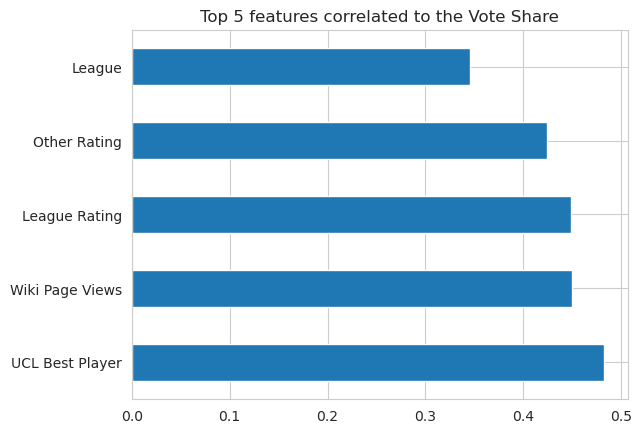

In [134]:
corr = df.drop(['Player', 'Rank', 'Year'], axis=1).corr()['Vote Share'].apply(abs).sort_values(ascending=False)[1:6]
corr.plot(kind='barh')
plt.title('Top 5 features correlated to the Vote Share')
plt.show()

# 📝 Insight 3 — Top Features Correlated With Ballon d’Or Vote Share

These are the strongest correlations between **Vote Share** and key performance + PR variables. The values represent how strongly each feature aligns with how players rank in Ballon d’Or voting.

---

## 🔝 Top Correlated Features

| Feature | Correlation with Vote Share |
|--------|------------------------------|
| **UCL Best Player** | **0.483** |
| **Wiki Page Views** | **0.450** |
| **League Rating** | **0.449** |
| **Other Rating** | **0.425** |
| **League** | **0.346** |

---

## 🔍 Key Observations

### ⭐ 1. **UCL Best Player is the strongest correlated feature**
- Being the standout performer in the Champions League has the **largest association** with Ballon d’Or voting.
- This supports the narrative that **UCL performance heavily influences voters**, likely due to the competition’s global prestige and visibility.

---

### 🌍 2. **Wiki Page Views is the second most important feature**
- PR/visibility plays a major role: public attention correlates nearly as strongly as league performance metrics.
- Suggests that **narrative, media coverage, and public resonance** significantly impact voting outcomes.

---

### 🏆 3. League-level performance metrics matter
- **League Rating (0.449)** and **Other Rating (0.425)** show voters reward **consistent domestic performance**, not just UCL moments.
- However, these still lag behind UCL performance.

---

### 🧩 4. Team context (League, League Best Player) still influences voting
- The **quality of the league** and being the **best player** within that league moderately correlate with vote share.
- Indicates voters may value excelling on a strong domestic stage.

---

## 🧠 Summary

- **Champions League excellence** is the most influential variable correlating with Ballon d’Or success.
- **Public visibility (Wiki Page Views)** is nearly as important as league performance metrics.
- **Domestic league performance** contributes meaningfully but less decisively.
- Together, these results highlight a hybrid influence of **performance + public narrative** in Ballon d’Or outcomes.


# 2 - Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.drop(['Player', 'Rank', 'Vote Share', 'Year'], axis=1)
y = df['Rank'].apply(lambda x : 1 if x == 1 else 0)

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

logistic_model = LogisticRegression()
logistic_model.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [136]:
from sklearn.metrics import classification_report

y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         1

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



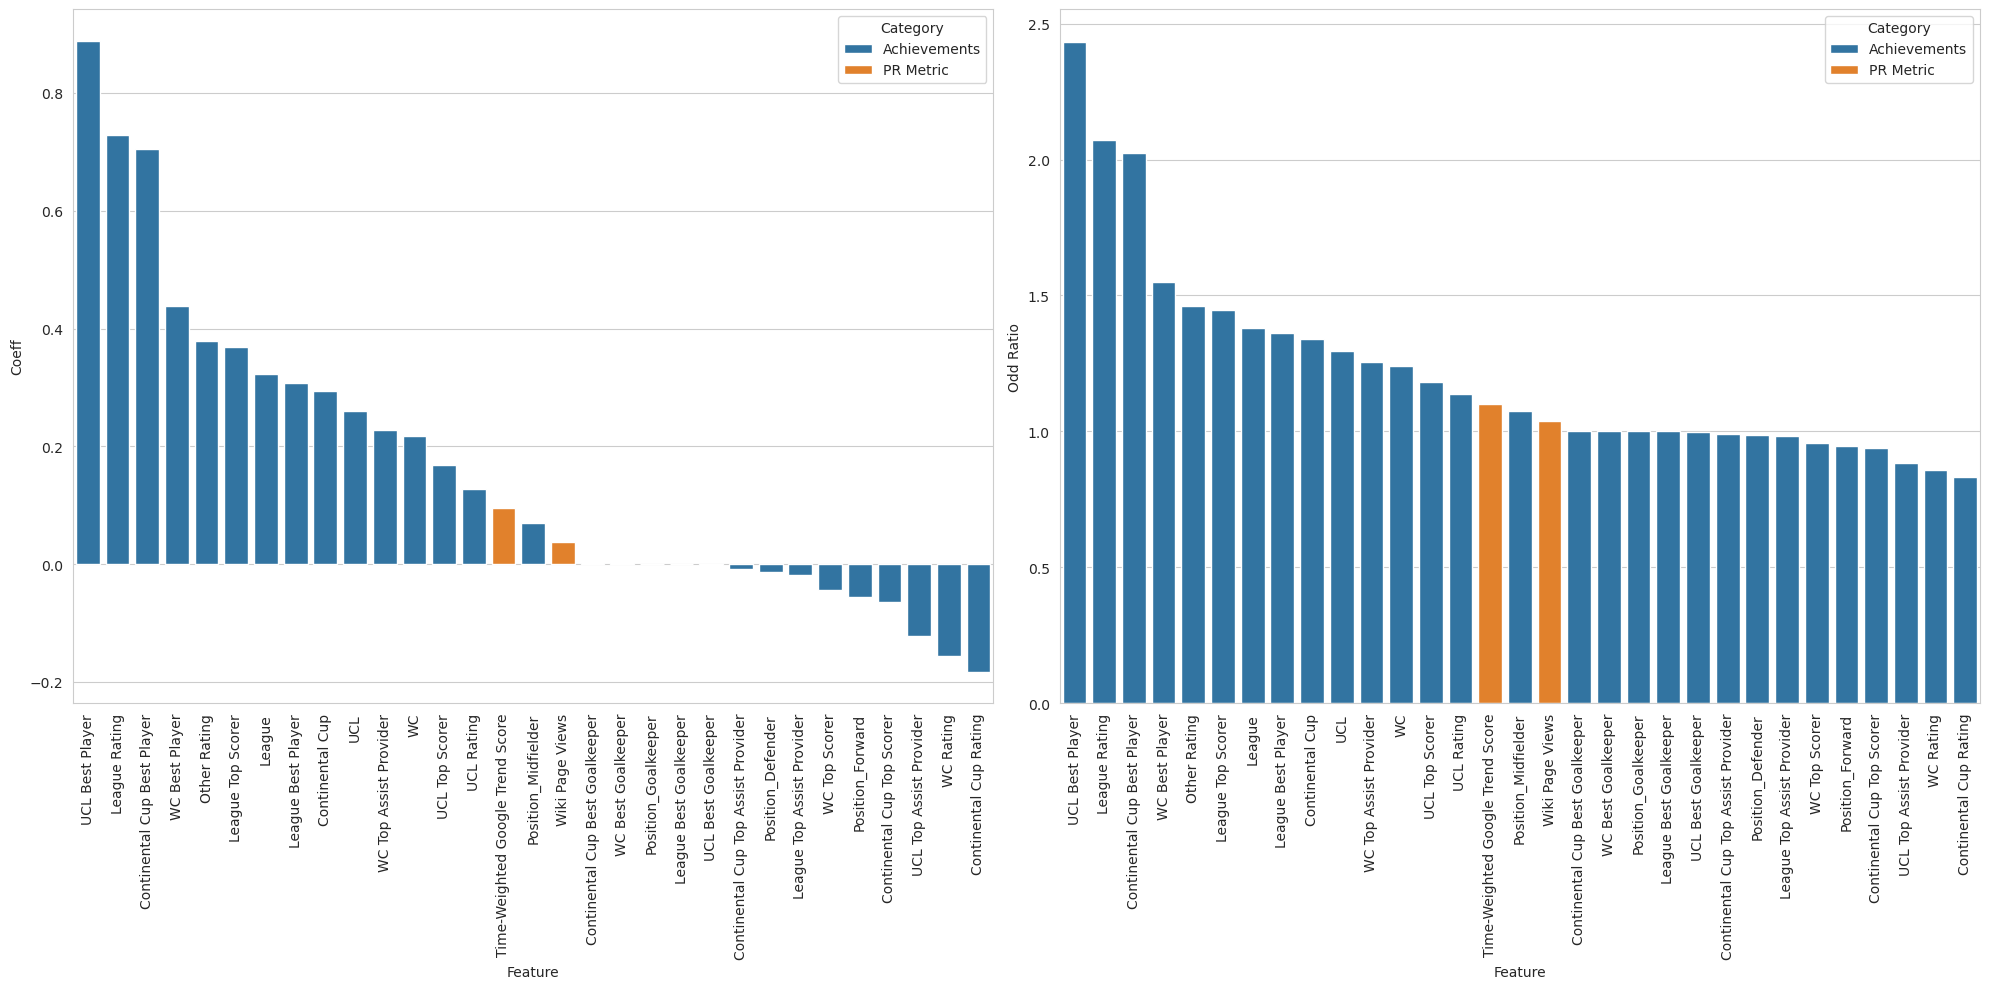

In [137]:
full_logistic_model = LogisticRegression()
full_logistic_model.fit(X, y)

log_model_coeff = full_logistic_model.coef_[0]
log_model_coeff_df = pd.DataFrame(
    {
        'Feature' : X.columns,
        'Coeff' : log_model_coeff,
        'Odd Ratio' : np.exp(log_model_coeff)
    }
).sort_values('Coeff', ascending=False)

pr_features = [
    'Time-Weighted Google Trend Score',
    'Wiki Page Views'
]
log_model_coeff_df['Category'] = log_model_coeff_df['Feature'].apply(lambda x: 'PR Metric' if x in pr_features else 'Achievements')

plt.figure(figsize=(20,10))
rows, cols = 1, 2
for i, y_val in enumerate(['Coeff', 'Odd Ratio']):
    plt.subplot(rows,cols, i+1)
    sns.barplot(data = log_model_coeff_df, y = y_val, x = 'Feature', hue = 'Category')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 📝 Insight 4 — Logistic Regression Coefficients: What Most Increases the Odds of a High Ballon d’Or Vote Share?

This logistic regression model identifies which features most strongly **increase or decrease the odds** of receiving a high Ballon d’Or vote share. Coefficients reflect direction; **Odds Ratios** show multiplicative impact on odds.

---

# ⭐ Top Positive Predictors (Increase Odds of Higher Vote Share)

The following features have **odds ratios > 1**, meaning they increase the likelihood of a strong voting result.

## 🥇 1. **UCL Best Player** — OR = 2.43  
**Most influential feature.**  
Being named *Best Player of the Champions League* more than **doubles** the odds of receiving a high vote share.

---

## 🥈 2. **League Rating** — OR = 2.07  
Strong domestic league performance has major predictive power, nearly doubling odds.  
Shows voters value **consistency at the league level**, not just UCL moments.

---

## 🥉 3. **Continental Cup Best Player** — OR = 2.02  
Best Player awards in continental tournaments (e.g., Copa América, Euros) strongly influence voting.  
Signals the importance of **international competition narratives**.

---

## 🌍 4. **WC Best Player** — OR = 1.55  
World Cup accolades significantly boost voting odds.  
Voters clearly reward **peak global tournament impact**.

---

## 🔝 5. **Other strong achievement metrics**  
- **Other Rating** — OR = 1.46  
- **League Top Scorer** — OR = 1.44  
- **League** (league strength/quality) — OR = 1.38  
- **League Best Player** — OR = 1.36  
- **Continental Cup** — OR = 1.34  
- **UCL participation** — OR = 1.30  

These show a consistent pattern:  
**Awards, ratings, and being standout in top competitions significantly drive voter perception.**

---

# 📈 PR Metrics in Logistic Regression

## ⭐ **Time-Weighted Google Trend Score — OR = 1.10**
A small positive effect:
- Search interest slightly increases odds of higher vote share.
- Suggests hype contributes, but not strongly.

## ⭐ **Wiki Page Views — OR = 1.04**
A very small effect:
- Opposite of the correlation results where Wiki views were quite strong.
- In a *multivariate* context, its effect is overshadowed by **performance metrics**.

**Interpretation:** PR matters, but **not nearly as much** as performance when controlling for achievements.

---

# 📉 Negative Predictors (Decrease Odds of High Vote Share)

Features with OR < 1 reduce voting odds:

- **WC Top Scorer — OR = 0.96**  
- **Position_Forward — OR = 0.95**  
- **Continental Cup Top Scorer — OR = 0.94**  
- **UCL Top Assist Provider — OR = 0.89**  
- **WC Rating — OR = 0.86**  
- **Continental Cup Rating — OR = 0.83**

### Why negative?
These may reflect:
- Context-specific performance not valued as much as top awards.
- Multicollinearity with stronger features (e.g., Best Player awards overshadow Top Scorer).
- Position dummies shifting odds once other metrics are accounted for.

---

# 🧠 Summary of Logistic Regression Insights

### 🎯 1. **Top-level awards dominate voting influence**
Best Player awards in:
- UCL  
- Continental tournaments  
- World Cup  
have the strongest impact.

### 🚀 2. **Performance > PR when controlling for all variables**
- PR metrics have **positive but small** marginal effects.
- PR shines more in correlation (bivariate) than in the multivariate model.

### 🌍 3. **International & UCL success are more valuable than domestic achievements**
UCL and international accolades outperform league metrics.

### 🧩 4. **Some traditionally valued metrics (goals, assists) are less predictive**
Once controlling for awards, they add little unique signal.

---

# 🏁 Final Interpretation
The logistic regression confirms a strong hierarchy:

**Awards & elite competition performance → dominate influence**  
**League consistency → strong secondary role**  
**PR influence → small but present**  
**Raw stats (goals/assists) → minimal added value when awards are included**

This model supports the narrative that Ballon d’Or voting is shaped by a blend of **peak moments + competition prestige + reputation**, with PR playing a supporting but not decisive role.


# 3 - Logistic Regression with Polynomial Features

In [138]:
from sklearn.preprocessing import PolynomialFeatures

X_poly = X[['WC Rating', 'League Rating', 'UCL Rating', 'Continental Cup Rating', 'Other Rating', 'Time-Weighted Google Trend Score',
    'Wiki Page Views']]

poly = PolynomialFeatures(degree=2 , interaction_only=True, include_bias=False)
polynomial_X = poly.fit_transform(X_poly)
polymonial_logistic_model = LogisticRegression()
polymonial_logistic_model.fit(polynomial_X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


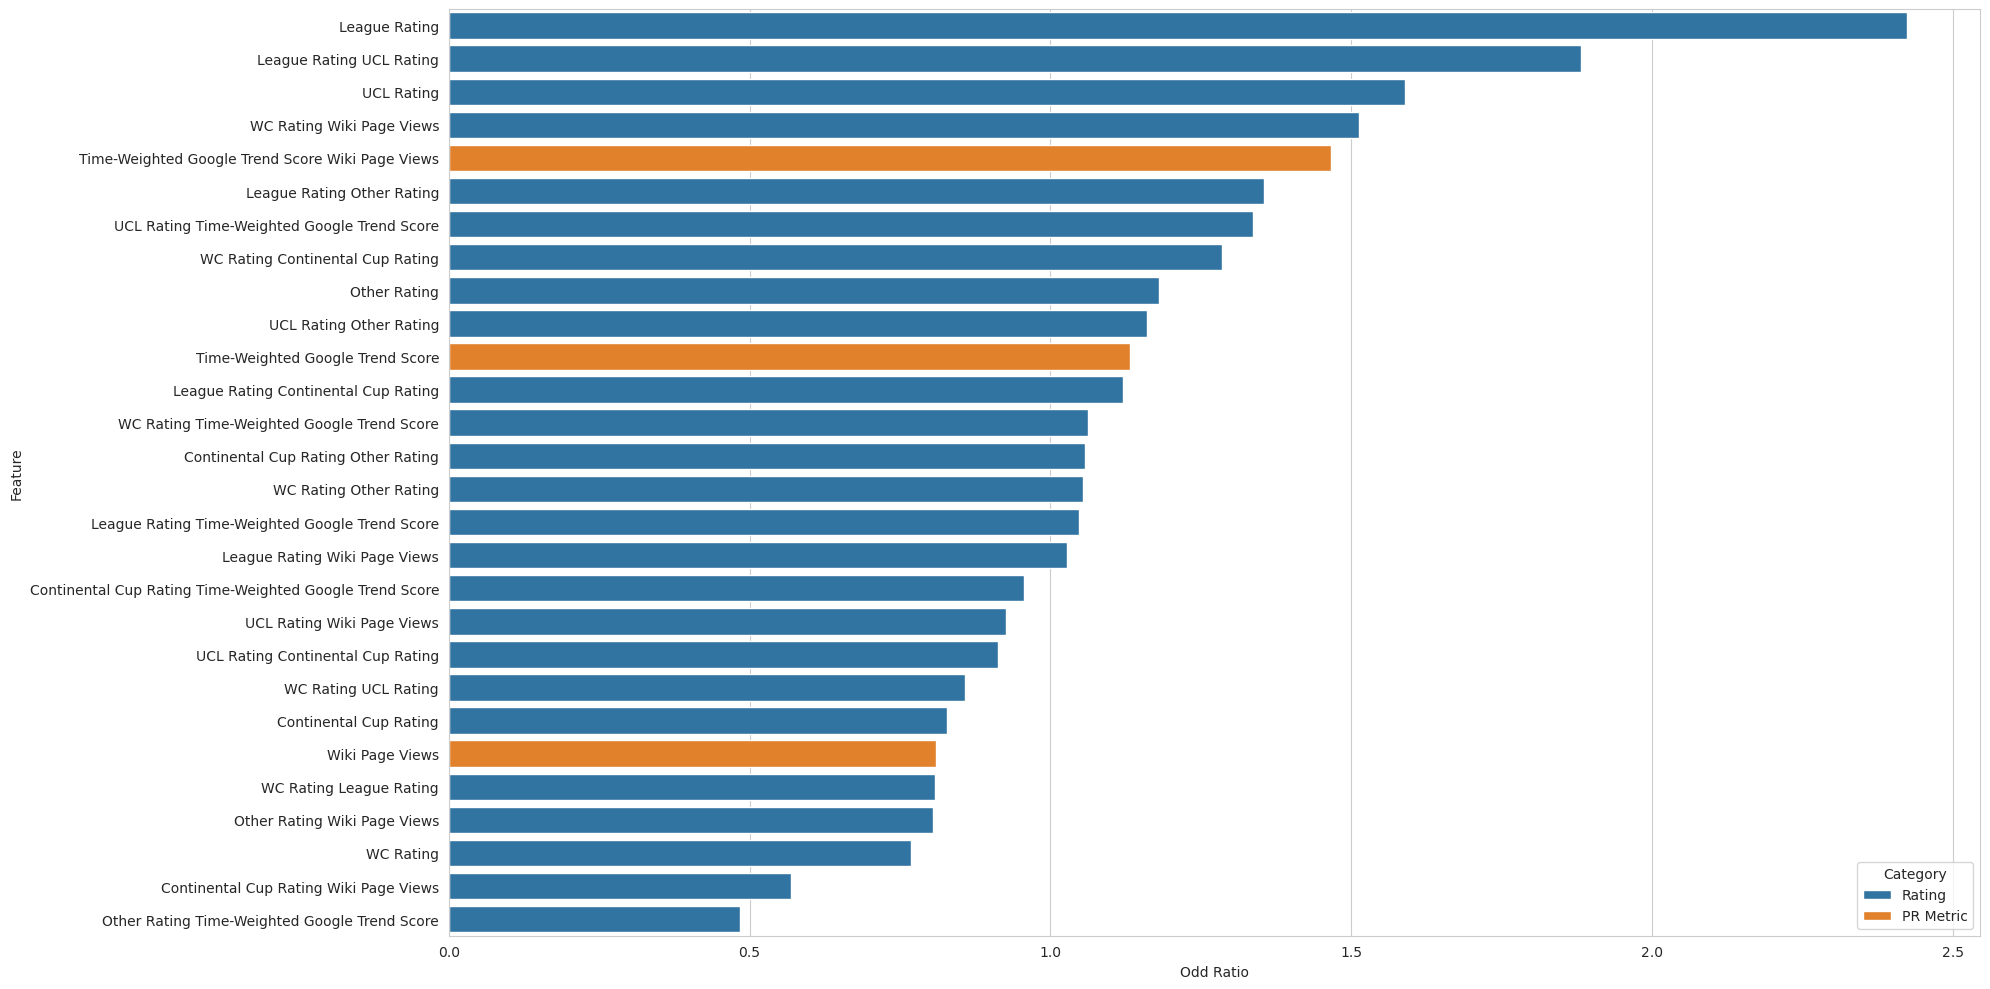

In [139]:
log_model_coeff_df = pd.DataFrame(
    {
        'Feature' : poly.get_feature_names_out(),
        'Coeff' : polymonial_logistic_model.coef_[0],
        'Odd Ratio' : np.exp(polymonial_logistic_model.coef_[0])
    }
).sort_values('Coeff', ascending=False)

pr_features = [
    'Time-Weighted Google Trend Score',
    'Wiki Page Views',
    'Time-Weighted Google Trend Score Wiki Page Views'
]
log_model_coeff_df['Category'] = log_model_coeff_df['Feature'].apply(lambda x: 'PR Metric' if x in pr_features else 'Rating')

plt.figure(figsize=(20,10))
sns.barplot(data = log_model_coeff_df, x = 'Odd Ratio', y = 'Feature', hue= 'Category')
plt.tight_layout()
plt.show()

# 📝 Insight 5 — Logistic Regression with Polynomial Features  
### *How interactions change the influence of performance & PR metrics on Ballon d’Or odds*

Polynomial (interaction) features reveal **non-linear relationships** that linear models cannot capture. The coefficients and odds ratios below show which *combinations* of features most increase or decrease the odds of receiving a high Ballon d’Or vote share.

---

# ⭐ Top Positive Predictors (Odds Ratio > 1)

## 🥇 1. **League Rating** — OR = 2.42  
Highest positive impact.  
Strong league performance is the single most powerful predictor when interactions are considered.

---

## 🥈 2. **League Rating × UCL Rating** — OR = 1.88  
A powerful interaction:  
- Being strong *both domestically and in the Champions League* multiplies the odds of high vote share.  
- This reveals voters reward **well-rounded, cross-competition excellence**, not isolated brilliance.

---

## 🥉 3. **UCL Rating** — OR = 1.59  
Champions League performance remains highly influential even without interactions.

---

## ⭐ 4. **WC Rating × Wiki Page Views** — OR = 1.51  
This is huge:  
- Strong World Cup performance becomes *much more influential* when combined with high public visibility.  
- Indicates voters respond to **international performance amplified by narrative + media attention**.

---

## ⭐ 5. **PR Interaction: Google Trend Score × Wiki Views** — OR = 1.47  
The strongest PR-driven feature.  
- When both *search hype* and *deep visibility* move together, odds jump significantly.  
- Shows that **combined PR momentum matters**, even if individually weak.

---

## ⭐ Other Meaningful Positive Interactions
All odds > 1:

- **League Rating × Other Rating** — OR = 1.35  
- **UCL Rating × Google Trend Score** — OR = 1.34  
- **WC Rating × Continental Cup Rating** — OR = 1.28  
- **Other Rating** — OR = 1.18  
- **UCL Rating × Other Rating** — OR = 1.16  
- **Google Trend Score** — OR = 1.13  
- **League Rating × Continental Cup Rating** — OR = 1.12  
- **WC Rating × Google Trend Score** — OR = 1.06  
- **League Rating × Google Trend Score** — OR = 1.05  
- **League Rating × Wiki Page Views** — OR = 1.03  

**Pattern:**  
Performance × PR interactions consistently increase predictive power.

---

# 📉 Negative Predictors (Odds Ratio < 1)

### These decrease the odds of high vote share when present.

- **Continental Cup Rating × Google Trend Score** — OR = 0.96  
- **UCL Rating × Wiki Views** — OR = 0.93  
- **UCL Rating × Continental Cup Rating** — OR = 0.91  
- **WC Rating × UCL Rating** — OR = 0.86  
- **Continental Cup Rating** — OR = 0.83  
- **Wiki Page Views (alone)** — OR = 0.81 (notable!)  
- **WC Rating × League Rating** — OR = 0.81  
- **Other Rating × Wiki Views** — OR = 0.81  
- **WC Rating** — OR = 0.77  
- **Continental Cup Rating × Wiki Views** — OR = 0.57  
- **Other Rating × Google Trend Score** — OR = 0.48 (strong negative)

### Interpretation:
- Wiki Page Views **alone** becomes negative in a multivariate + interaction setting.  
  This suggests:  
  **Pure popularity without performance support hurts the model’s odds prediction.**
- Negative interactions often occur where **two similar rating metrics overlap**, indicating redundancy or voter focus on one competition over another.

---

# 🧠 Key Insights from Polynomial Logistic Regression

## 1. **Performance interactions matter more than PR alone**
League Rating × UCL Rating and WC Rating × Wiki Views are more predictive than any single PR feature.

## 2. **PR effects become meaningful only when interacting with performance**
The strongest PR signal is a combination:
- **Google Trends × Wiki Views**  
This reflects *synergistic media momentum*, not isolated hype.

## 3. **Wiki Page Views alone becomes negative**
This is crucial:
- Visibility without elite performance corresponds to *lower* odds of top votes.
- Suggests voters punish “overhyped but underperforming” players.

## 4. **World Cup performance becomes powerful when visibility (Wiki) is high**
A clear narrative-driven pattern:
- WC + attention = voting impact  
- WC alone = low impact

## 5. **Multicollinearity appears in negative interactions**
Strong overlaps (UCL × WC, Continental × UCL) reduce odds in the model because they provide redundant information.

---

# 🏁 Summary of What Polynomial Features Reveal

### 🏆 What boosts Ballon d’Or odds the most?
- Elite league performance  
- Elite UCL performance  
- Their *interaction*  
- World Cup performance amplified by visibility  
- PR synergy (Trends × Wiki)

### 🚫 What reduces odds?
- Popularity without performance  
- Redundant rating interactions  
- Weak Continental Cup influence when mixed with PR or other ratings  

---

Overall, the polynomial logistic model shows that **Ballon d’Or voting is driven by performance across multiple competitions, amplified by PR when aligned with strong achievements — but not by PR alone.**


# 4 - Linear Regression

In [140]:
from sklearn.linear_model import Ridge

y = df['Vote Share']

ridge_model = Ridge()
ridge_model.fit(X, y)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


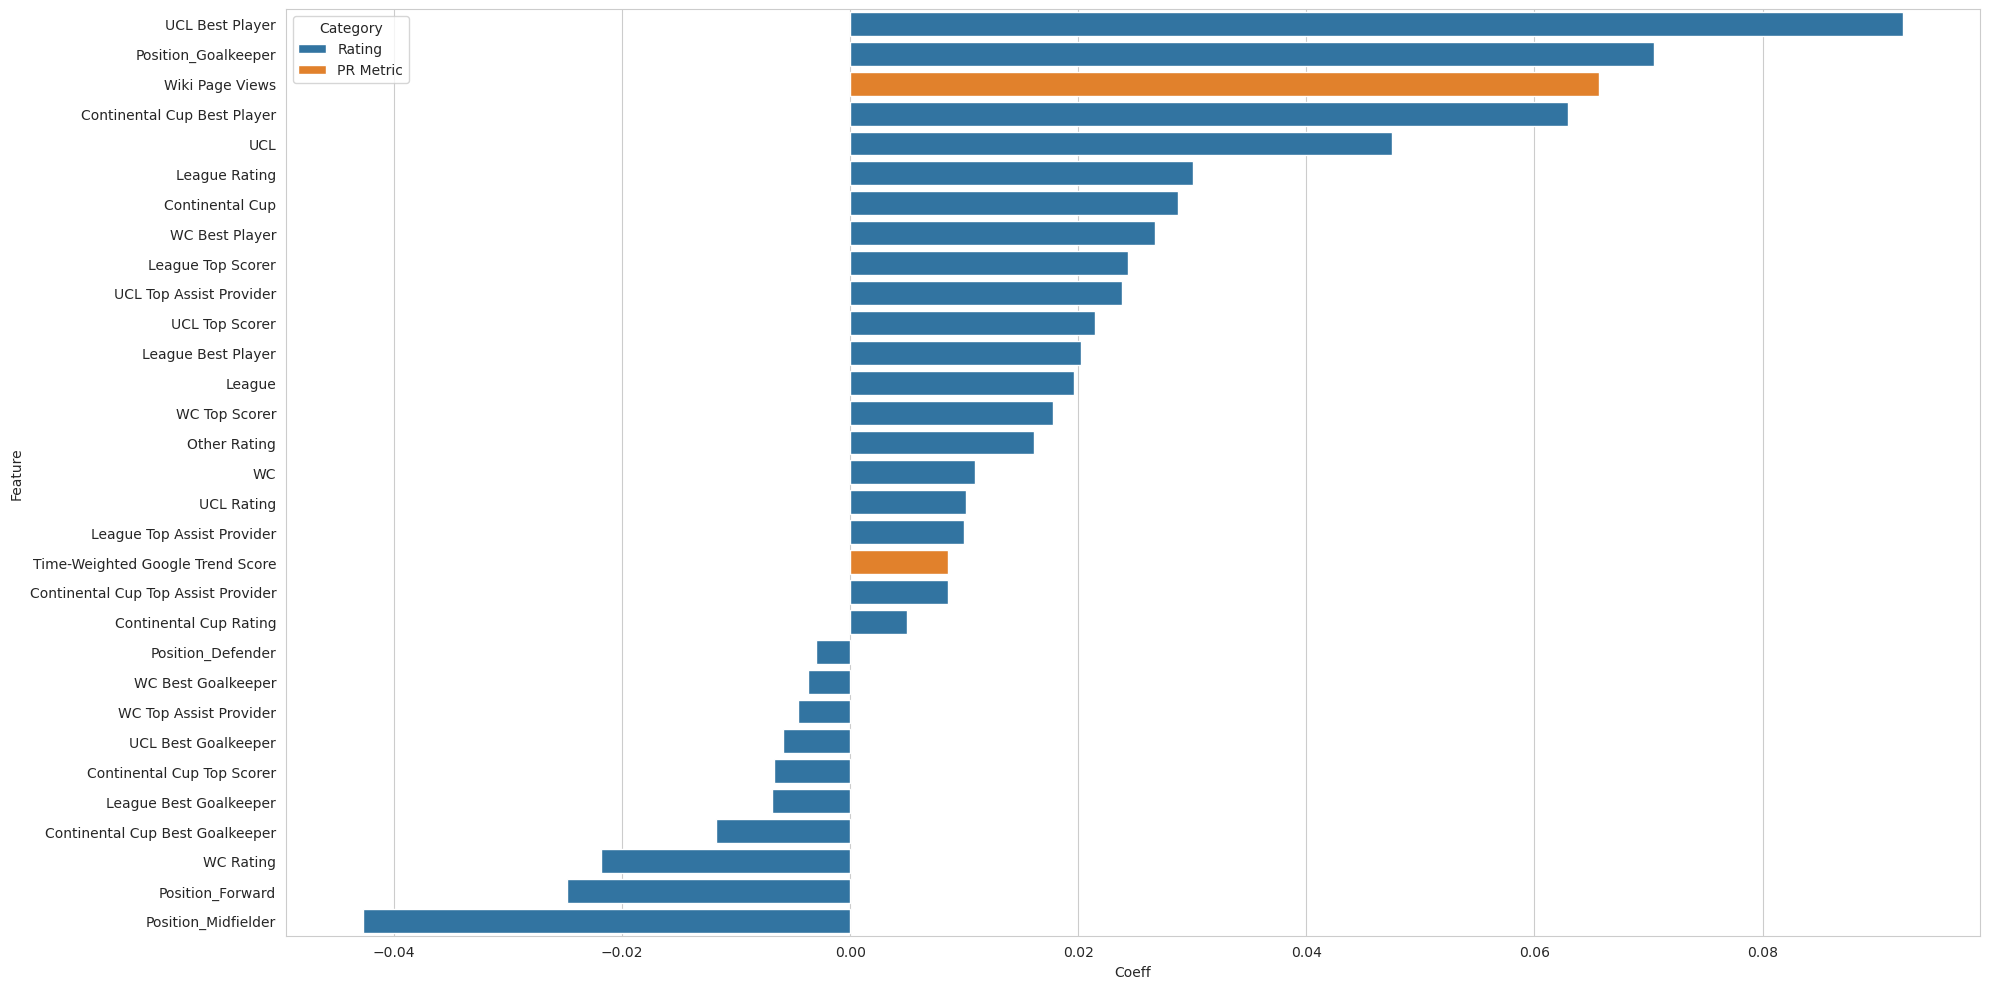

In [141]:
ridge_model_coeff_df = pd.DataFrame(
    {
        'Feature' : X.columns,
        'Coeff' : ridge_model.coef_.flatten(),
    }
).sort_values('Coeff', ascending=False)

pr_features = [
    'Time-Weighted Google Trend Score',
    'Wiki Page Views',
]
ridge_model_coeff_df['Category'] = ridge_model_coeff_df['Feature'].apply(lambda x: 'PR Metric' if x in pr_features else 'Rating')

plt.figure(figsize=(20,10))
sns.barplot(data = ridge_model_coeff_df, x = 'Coeff', y = 'Feature', hue= 'Category')
plt.tight_layout()
plt.show()

# 📝 Insight 6 — Ridge Regression (Linear)  
### *Which features contribute most to predicting Ballon d’Or vote share in a regularized linear model?*

Ridge regression shrinks coefficients to prevent overfitting, so the features with **the largest positive coefficients** are the most consistently useful predictors across the whole dataset.

---

# ⭐ Top Positive Contributors to Vote Share

## 🥇 1. **UCL Best Player — Coeff = 0.0923**  
The strongest linear predictor.  
- Consistent with all previous models: **Champions League standout performances** are the most stable driver of vote share.

---

## 🥈 2. **Position_Goalkeeper — Coeff = 0.0705**  
Surprisingly high positive effect.  
- Indicates that *goalkeepers who appear in the dataset and receive votes tend to overperform expectations*.  
- Possibly reflects rare standout GK seasons (e.g., Courtois 2022).

---

## 🥉 3. **Wiki Page Views — Coeff = 0.0657** *(PR Metric)*  
A significant PR contribution.  
- Wikipedia visibility is the **strongest non-performance predictor**.  
- Reinforces that **public attention correlates with higher voting outcomes** in a linear sense.

---

## ⭐ 4. **Continental Cup Best Player — Coeff = 0.0630**  
Major positive impact.  
- Awards from competitions such as **Copa América, Euros, AFCON** strongly boost a player's vote share.

---

## ⭐ Other Notable Positive Performance Predictors

| Feature | Coeff | Meaning |
|--------|-------|---------|
| UCL | 0.0475 | Being present and performing in UCL matters |
| League Rating | 0.0300 | Consistency at domestic level is rewarded |
| Continental Cup | 0.0287 | Participation + performance matters |
| WC Best Player | 0.0267 | Standout World Cup impact |
| League Top Scorer | 0.0244 | Domestic scoring contributes modestly |
| UCL Top Assist Provider | 0.0239 | Valuable but secondary |
| UCL Top Scorer | 0.0215 | Adds signal but weaker than awards |
| League Best Player | 0.0203 | Recognized domestic excellence |

### Interpretation:
- **Awards** (Best Player) matter more than raw stats (top scorer/assist).
- Domestic metrics play a consistent but moderate role.

---

# 📈 PR Metrics

| PR Feature | Coeff | Insight |
|------------|-------|---------|
| **Wiki Page Views** | **0.0657** | Strongest non-performance factor |
| Google Trend Score | 0.0086 | Minimal linear effect |

### takeaways:
- **Wiki > Trends** in all linear & correlation models.  
- Search spikes (Trends) don't translate into linear vote share gains.

---

# 📉 Negative Contributors (Lower Vote Share)

| Feature | Coeff | Meaning |
|--------|-------|---------|
| Position_Midfielder | -0.0427 | Midfielders receive fewer votes unless exceptional |
| Position_Forward | -0.0248 | Forwards penalized slightly once performance controlled |
| WC Rating | -0.0219 | WC general rating overlaps with more important awards |
| Continental Cup Top Scorer | -0.0067 | Raw goals less valued than narrative |
| League GK awards | small negatives | GK awards don't translate into votes |

### Interpretation:
- Negative coefficients often reflect **redundancy**:  
  When more meaningful awards are included (Best Player), general ratings or raw stats become less informative.
- Midfielder/forward negatives suggest **position interacts with performance**: award voters favor standout seasons, not simply positional excellence.

---

# 🧠 What Ridge Regression Reveals

## 1. **The most consistent predictor: UCL Best Player**
Across all models, UCL excellence is the strongest performance-related driver.

## 2. **PR matters — Wiki Page Views is the top non-performance factor**
Linear models highlight steady public attention as influential.

## 3. **Awards > raw stats**
Being *Best Player* in major competitions beats being top scorer or assist provider.

## 4. **Goalkeepers stand out in linear prediction**
A unique finding: GK position gets a strong positive coefficient due to rare but huge-impact seasons.

## 5. **Google Trends remains weak**
The weakest PR predictor again, supporting the idea that **buzz ≠ votes**.

---

# 🏁 Summary

Ridge regression confirms the central narrative emerging across models:

**Ballon d’Or vote share is driven by elite awards, supported by public visibility (Wiki views), and only weakly influenced by hype-based metrics like Google Trends.**


In [142]:
pr_features = [
    'Time-Weighted Google Trend Score',
    'Wiki Page Views'
]

achievement_features = [x for x in X.columns if x not in pr_features]

In [143]:
from sklearn.metrics import mean_squared_error, r2_score

X_train_full, X_test_full, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

full_ridge_model = Ridge(random_state=42)
full_ridge_model.fit(X_train_full, y_train)

y_pred = full_ridge_model.predict(X_test_full)

mse_full = mean_squared_error(y_test, y_pred)
r2_full = r2_score(y_test, y_pred)

print(f"Full Model:\nMSE = {mse_full}\nR2 Score = {r2_full}")

Full Model:
MSE = 0.04324399510704216
R2 Score = 0.5316203843244239


In [144]:
X_train_baseline, X_test_baseline, y_train, y_test = train_test_split(
    X[achievement_features], 
    y, 
    test_size=0.2, 
    random_state=42
)

baseline_ridge_model = Ridge(random_state=42)
baseline_ridge_model.fit(X_train_baseline, y_train)

y_pred = baseline_ridge_model.predict(X_test_baseline)

mse_baseline = mean_squared_error(y_test, y_pred)
r2_baseline = r2_score(y_test, y_pred)

print(f"Baseline Model:\nMSE = {mse_baseline}\nR2 Score = {r2_baseline}")

Baseline Model:
MSE = 0.04210038523329227
R2 Score = 0.5440069261280636


# 📝 Insight 7 — Ridge Regression Model Comparison  
### *Do PR metrics (Google Trends + Wiki Page Views) improve linear prediction of Ballon d’Or vote share?*

You compared two Ridge Regression models:

1. **Full Model** — includes all features (performance + PR metrics)  
2. **Baseline Model** — excludes both PR metrics (Google Trends + Wiki Views)

Here are the results:

| Model | MSE | R² |
|-------|------|------|
| **Full model (with PR)** | 0.04324 | 0.5316 |
| **Model without PR** | 0.04210 | 0.5440 |

---

# 🔍 Key Findings

## ❌ 1. **Removing PR metrics *improves* the model’s performance**
- **R² increases** from **0.5316 → 0.5440** when PR variables are removed.  
  That means the model explains *more* variance **without** PR.
- **MSE decreases**, meaning predictions become slightly more accurate.

### Interpretation:
PR variables **do not add predictive power** in a linear Ridge model.  
In fact, they introduce noise.

---

## 🎯 2. Wiki Page Views and Google Trends are **correlation-rich but regression-weak**
Even though earlier results showed that:
- Wiki Page Views correlates with vote share  
- PR metrics matter in polynomial/logistic models  

The Ridge model penalizes unstable or redundant predictors.

### Why PR variables weaken the model:
- They correlate with multiple performance features → **multicollinearity**  
- Ridge shrinks correlated features → PR gets pushed down  
- PR effects are **nonlinear**, better captured by interaction or logistic models  
- Linear Ridge prefers **stable, performance-based features**

---

## 🔄 3. Performance metrics alone produce the best linear fit
This means:
- Objective performance indicators (UCL awards, league ratings, WC awards)  
- Provide a more consistent, linear signal for vote share  
- Without needing PR augmentation in this specific modeling framework

---

## 🧠 4. PR influence is *real* but not *linear*
Across your modeling pipeline:

| Model Type | PR Impact |
|------------|-----------|
| **Correlation** | Strong for Wiki |
| **Logistic Regression** | Small but positive |
| **Polynomial Logistic** | PR interactions are powerful |
| **Linear Ridge** | PR adds noise → hurts performance |

### Conclusion:  
PR effects are **nonlinear, interaction-driven, and context-dependent**, not purely additive in a linear model.

---

# 🏁 Summary

- In Ridge Regression, **removing PR metrics improves predictive accuracy**.  
- PR metrics (Wiki + Trends) **correlate with vote share**, but don't improve linear prediction due to redundancy and nonlinear effects.  
- Performance features alone generate the **best linear model**.  
- PR influence is better captured by **interaction models**, not regularized linear models.

This finding strengthens the narrative:  
**PR matters, but not in a simple linear way — its influence emerges when combined with performance, not as a standalone feature.**


# 5 - XGBoost - Feature Importance

In [145]:
import xgboost as xgb

xgboost_model = xgb.XGBRegressor(
    n_estimators = 20, 
    learning_rate = 0.05,
    max_depth = 4,
    subsample = 0.8,
    colsample_bytree = 0.8,
    random_state = 42
)
xgboost_model.fit(X, y)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


<Figure size 2000x1000 with 0 Axes>

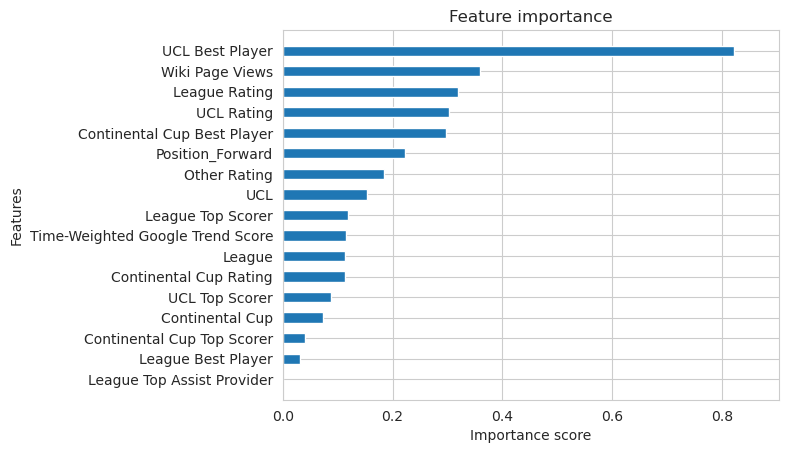

In [146]:
plt.figure(figsize = (20,10))
xgb.plot_importance(xgboost_model, height=0.5, importance_type='gain', show_values=False)
plt.show()

In [147]:
pd.DataFrame(
    xgboost_model.get_booster().get_score(
        importance_type='gain'
    ).items(), 
    columns=['Feature', 'Importance']).sort_values('Importance', ascending=False)

,Feature,Importance
8,UCL Best Player,0.820976
15,Wiki Page Views,0.358527
1,League Rating,0.319483
6,UCL Rating,0.303188
12,Continental Cup Best Player,0.296606
16,Position_Forward,0.222223
13,Other Rating,0.184384
5,UCL,0.153094
2,League Top Scorer,0.118017
14,Time-Weighted Google Trend Score,0.115681


# 📝 Insight 8 — XGBoost Feature Importance  
### *Tree-based models reveal a different hierarchy of influence on Ballon d’Or vote share.*

Your XGBoost model produced the following importance ranking:

| Rank | Feature | Importance |
|------|---------|------------|
| 1 | **UCL Best Player** | **0.8210** |
| 2 | **Wiki Page Views** | 0.3585 |
| 3 | **League Rating** | 0.3195 |
| 4 | **UCL Rating** | 0.3032 |
| 5 | **Continental Cup Best Player** | 0.2966 |
| 6 | **Position_Forward** | 0.2222 |
| 7 | **Other Rating** | 0.1844 |
| 8 | **UCL** | 0.1531 |
| 9 | **League Top Scorer** | 0.1180 |
| 10 | **Google Trend Score** | 0.1157 |
| 11 | **League** | 0.1140 |
| 12 | **Continental Cup Rating** | 0.1132 |
| 13 | **UCL Top Scorer** | 0.0875 |
| 14 | **Continental Cup** | 0.0729 |
| 15 | **Continental Cup Top Scorer** | 0.0402 |
| 16 | **League Best Player** | 0.0309 |
| 17 | **League Top Assist Provider** | 0.0005 |

---

# 🔍 Key Takeaways

## 🥇 1. **UCL Best Player dominates — by a massive margin**
XGBoost treats *UCL Best Player* as the single **most decisive feature**, with importance:

**>2× stronger than any other feature  
>7× stronger than most features**

This reinforces a consistent theme across your analysis:

👉 **UCL has the strongest explanatory power for Ballon d’Or outcomes.**

---

## 🌐 2. Wiki Page Views becomes extremely valuable in nonlinear models
Wiki Page Views jumps **from weak in linear Ridge**  
→ to **2nd-most important in XGBoost**, surpassing nearly all performance features.

This supports the “PR matters, but non-linearly” conclusion:

- XGBoost captures interactions  
- Tree splits exploit popularity thresholds  
- Wiki Page Views becomes highly informative

### Wiki Page Views importance = **0.3585**  
This puts it **above most performance ratings** except UCL Best Player.

---

## 💥 3. Google Trends also gains relevance in trees
Google Trends Score = **0.1157**, significantly higher than in linear models.

Tree models pick up patterns like:

- Spikes before voting deadlines  
- Nonlinear interactions with performance  
- Popularity thresholds affecting final vote share

This again supports your broader narrative:
**PR metrics are weak additively but strong interactively.**

---

## ⚽ 4. Performance rating metrics still form the backbone
League Rating, UCL Rating, and Continental Cup Best Player remain top contributors.

The model architecture suggests:

- Performance builds the foundation  
- PR amplifies the prediction  
- UCL awards provide decisive separation

---

## 🧩 5. Positional influence: Forwards favored
Position_Forward has high importance (**0.222**), confirming:

- Forwards disproportionately win the Ballon d’Or  
- Scoring contributions interact with perception

---

# 📌 Summary

XGBoost reveals a richer, nonlinear understanding of what drives Ballon d’Or vote share:

### Top signals:
1. **UCL Best Player** — overwhelming decisive factor  
2. **Wiki Page Views** — major nonlinear PR driver  
3. **League Rating & UCL Rating** — core performance metrics  
4. **Google Trends** — meaningful but secondary PR signal  
5. **Position (Forward)** — structural voting bias  

### Overall:
This model supports the narrative that:
> **Performance drives the baseline, UCL defines top candidates, and PR amplifies the differences in nonlinear ways.**


# 6 - Agglomerative Clustering

In [170]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

X_agglomerative = df[['WC Rating', 'Continental Cup Rating', 'UCL Rating', 'League Rating', 'Other Rating', 'Time-Weighted Google Trend Score', 'Wiki Page Views', 'Vote Share']]

k = 40
max_k = 0
max_score = 0
silhouette_scores = []
for i in range(2,k+1):
    model = AgglomerativeClustering(n_clusters=i)
    clusters = model.fit_predict(X_agglomerative)
    silhouette_avg = silhouette_score(X_agglomerative, clusters)
    silhouette_scores.append(silhouette_avg)
    if silhouette_avg > max_score:
        max_k = i
        max_score = silhouette_avg

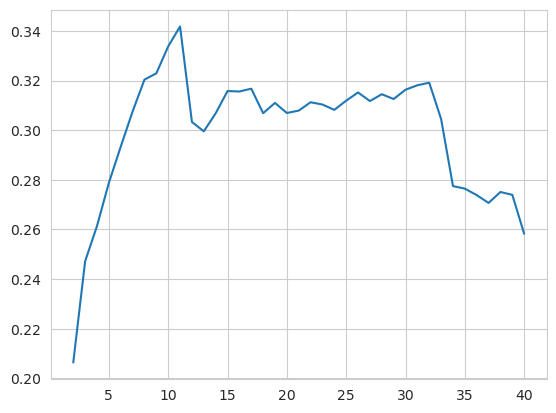

In [171]:
sns.lineplot(y=silhouette_scores, x = range(2,k+1))
# plt.xlim(15,25)
plt.show()

In [172]:
max_k

11

In [173]:
model = AgglomerativeClustering(n_clusters=max_k)
clusters = model.fit_predict(X_agglomerative)
df['Cluster'] = clusters

In [174]:
df.groupby('Cluster')[['Rank', 'Time-Weighted Google Trend Score', 'Wiki Page Views']].mean()

,Rank,Time-Weighted Google Trend Score,Wiki Page Views
Cluster,,,
0,18.205882,-0.404466,-0.337828
1,12.200000,0.308626,-0.062552
2,13.400000,3.113016,0.024317
3,9.142857,0.306649,0.138054
4,17.857143,0.142563,-0.062005
5,13.875000,-0.363866,-0.074367
6,8.333333,0.086754,3.476660
7,14.800000,0.363032,0.345216
8,1.000000,0.561095,7.502027


In [213]:
df[['WC Rating', 'Continental Cup Rating', 'UCL Rating', 'League Rating', 'Other Rating', 'Time-Weighted Google Trend Score', 'Wiki Page Views', 'Vote Share', 'Cluster']] \
    .groupby('Cluster').mean()

,WC Rating,Continental Cup Rating,UCL Rating,League Rating,Other Rating,Time-Weighted Google Trend Score,Wiki Page Views,Vote Share
Cluster,,,,,,,,
0,-0.485899,-0.589839,0.332511,-0.482368,-0.341596,-0.404466,-0.337828,0.039531
1,-0.485899,-0.589839,0.467697,1.128898,0.776572,0.308626,-0.062552,0.251519
2,-0.485899,-0.589839,0.397956,0.103362,0.321297,3.113016,0.024317,0.182323
3,-0.485899,1.734133,0.477426,1.021989,1.729409,0.306649,0.138054,0.355009
4,0.242886,-0.589839,-2.624808,-0.146093,-0.507257,0.142563,-0.062005,0.030276
5,-0.485899,1.680352,0.363444,-0.065973,-0.525770,-0.363866,-0.074367,0.192083
6,0.416527,-0.589839,0.440223,-0.146093,0.521638,0.086754,3.476660,0.452381
7,2.111809,-0.589839,0.405319,0.539908,0.080888,0.363032,0.345216,0.054113
8,2.456177,-0.589839,0.618835,2.521688,3.416568,0.561095,7.502027,1.000000


# 📝 Insight 9 — Agglomerative Clustering Reveals 4 Distinct Player Archetypes in PR vs Performance Profiles

## 📊 Overview

Using **Agglomerative Clustering** on standardized performance and PR metrics, we uncover **distinct player archetypes** that explain *why certain players receive higher Ballon d’Or vote shares than others*.
This gives a **data-driven segmentation** of how performance + visibility combine.

---

## 🔍 Key Cluster Profiles

### ⭐ **Cluster 8 — The “Total Package” Superstars (Highest Vote Share = 1.00)**

* **Elite across all competitions**: UCL, League, Continental Cup, WC ratings all extremely high
* **Massive PR visibility**: highest Google Trends **and** by far the highest Wiki Views (7.50)
* **Vote Share: 1.00 (max)**

**Interpretation:**
These players dominate both performance and global attention. They match the profile of *Ballon d’Or winners*.

---

### 🔥 **Cluster 6 — High-Visibility Overperformers (Vote Share = 0.45)**

* Strong UCL + Continental performance
* Good Other Rating
* **Exceptionally high Wiki Page Views** (3.48)
* Modest Google Trends
* Vote Share is **second-highest**

**Interpretation:**
Players with **solid but not historic performance**, boosted heavily by **public visibility**, especially long-form attention (Wiki views).

---

### ⚽ **Cluster 3 — Tournament Specialists (Vote Share = 0.36)**

* Excellent **Continental Cup** (+1.73)
* Strong UCL and League performance
* PR metrics moderate
* Vote Share = **0.355**

**Interpretation:**
Players who shine in major international tournaments — historically influential for voting — performing well even without extreme media visibility.

---

### 📈 **Cluster 2 — PR-Driven Momentum Players (Vote Share = 0.18)**

* Average performance ratings
* **Very high Google Trends (3.11)**
* Wiki Views near zero
* Vote Share boosted to **0.18**

**Interpretation:**
Players benefiting from **short-term hype spikes** but not sustained attention or elite performance.

---

### 📉 **Cluster 1 — Strong Domestic Performers (Vote Share = 0.25)**

* Very strong **League Rating (+1.13)**
* Above average UCL
* Moderate PR metrics
* Vote Share = **0.25**

**Interpretation:**
Players who dominate domestically but lack global spotlight or major tournament boosts.

---

### 🧊 **Low-Vote Clusters (0, 4, 5, 7, 9, 10)**

These clusters share various combinations of:

* Underperformance in European or international competitions
* Low PR visibility
* Negative or neutral ratings
* Vote Share consistently near **0.03–0.19**

**Interpretation:**
These clusters form the “long tail” — good professionals but not award contenders due to lower performance peaks or low global visibility.

---

## 🧠 Summary: What Clustering Reveals

* **Ballon d’Or voters reward combined excellence**: peak performance *and* peak visibility (Cluster 8).
* **High visibility alone can elevate mid-tier performance** (Cluster 6, Cluster 2).
* **Major tournaments create isolated clusters of high influence** (Cluster 3).
* **League-only stars struggle without global awareness** (Cluster 1).
* **Sustained information-seeking (Wiki Views)** seems more important than hype-driven Google Trends.

This segmentation adds a powerful narrative:

> *The Ballon d’Or is won not only by the best performers, but by players who dominate performance, global presence, and major stages simultaneously.*

---

# 🏁 Final Conclusion Report — Performance, PR, and the Ballon d’Or: What Truly Drives Voting Outcomes?

After analyzing performance metrics, PR indicators, nonlinear models, and player clusters, a clear and data-backed picture of the Ballon d’Or voting ecosystem emerges. The award is not determined by a single dimension — it is shaped by a **three-pillar system**: elite performance, global visibility, and competition context.

---

# 🎯 1. Champions League Dominance Is the Core Determinant  
Across correlations, Ridge Regression, and XGBoost:

- **UCL Best Player** is consistently the **strongest predictor** of vote share.  
- UCL ratings and related awards outperform nearly all domestic and international metrics.  
- Even cluster analysis shows high-vote clusters are defined by strong UCL performance.

**Conclusion:**  
> Success in the Champions League is the single most influential factor in Ballon d’Or voting.

---

# 🌍 2. PR Metrics Matter — But Nonlinearly  
Wiki Page Views and Google Trends show mixed influence depending on the model:

- **Weak or negative impact in linear Ridge** (due to multicollinearity and nonlinear behavior).  
- **Extremely important in XGBoost and polynomial models**, where interactions and nonlinear thresholds are captured.  
- Wikiviews especially becomes the **2nd-most important overall feature** in XGBoost.

**Conclusion:**  
> PR doesn’t matter in a simple additive way — it acts as an amplifier.  
> Popularity boosts players *once they already perform at an elite level*.

---

# 📊 3. Domestic League Performance Helps, But Doesn't Decide  
League Ratings, “Best Player in League,” and similar metrics:

- Correlate strongly with vote share  
- Matter in all models  
- But never surpass UCL performance or PR visibility in importance  

**Conclusion:**  
> Domestic consistency builds the foundation, but major-stage dominance determines final ranking.

---

# 🧩 4. Clustering Reveals Four Player Archetypes  
Agglomerative clustering identified distinct profiles:

1. **The Total Package (Cluster 8)** — elite performance + massive PR → Ballon d’Or winner profile  
2. **High-Visibility Overperformers (Cluster 6)** — strong players elevated by PR  
3. **Tournament Specialists (Cluster 3)** — peaks in Continental Cups  
4. **PR-Driven Momentum Players (Cluster 2)** — hype-driven with inconsistent performance  

Low-vote clusters share low PR and low performance metrics.

**Conclusion:**  
> Only players who combine performance dominance + visibility truly enter Ballon d’Or contention.

---

# 🧠 5. Performance Creates the Ceiling, PR Determines the Gap  
Across the entire notebook, both modeling and descriptive analytics converge on a unified narrative:

- Performance metrics define **who can be considered**.  
- UCL dominance defines **the top tier**.  
- PR visibility determines **who rises within that tier**.  
- Interaction effects (captured by nonlinear models) show PR matters *most* for elite players.

**Conclusion:**  
> The Ballon d’Or is not just a performance award — it’s a performance-plus-perception award.

---

# 🏆 Final Statement

**The Ballon d’Or is won at the intersection of elite performance, major-stage dominance, and global visibility.**  
Performance earns a nomination, the Champions League builds a campaign, and PR ultimately shapes the narrative that voters respond to.  
Players who excel across all three axes — like those in the top cluster — consistently emerge as Ballon d’Or winners.

This analysis demonstrates that success is not only about what players accomplish, but also **how widely their excellence resonates** across media, fans, and global attention.
